Competition Description
=======================
![House_Price](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png)
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.  

Practice Skills
===============
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

Acknowledgments
===============
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

# 设法理解数据

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('/Users/iTenki/Documents/GitHub/Kaggle/HousePrice_AdvancedRegressionTechniques/Data/train.csv')
test  = pd.read_csv('/Users/iTenki/Documents/GitHub/Kaggle/HousePrice_AdvancedRegressionTechniques/Data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


目的是要通过这些变量来预测出房子的价格，所以对于训练集数据可以通过建立变量与价格之间的透视表来简单了解一下它们之间的关系

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

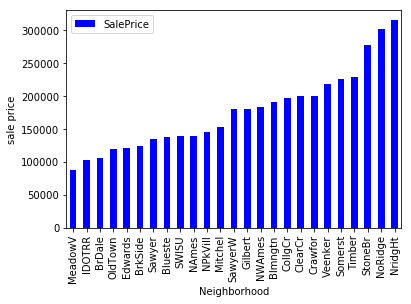

In [5]:
# Neighborhood: 表示的是房屋建筑所在的地理位置
nei_pivot = train.pivot_table(index = 'Neighborhood', values = 'SalePrice', aggfunc = np.median)
# 排序
nei_pivot_sorted = nei_pivot.sort_values(by = 'SalePrice')
nei_pivot_sorted.plot(kind = 'bar', color = 'blue')
plt.xlabel('Neighborhood')
plt.ylabel('sale price')
plt.show()

从图中可以看出，居住在MeadowV（Meadow Village）的房价最低，居住在NridgHt（Northridge Heights）的放假最高，翻译了一下，前者是草甸村，后者是北岭高地。  

通过在谷歌图片中搜索两处，可以明显看出北岭高地的房子装修较豪华，而草甸村看样子是个乡镇。**所以推测Neighborhood这个变量对房价有比较明显的影响，应当保留**。

In [6]:
from IPython.display import Image

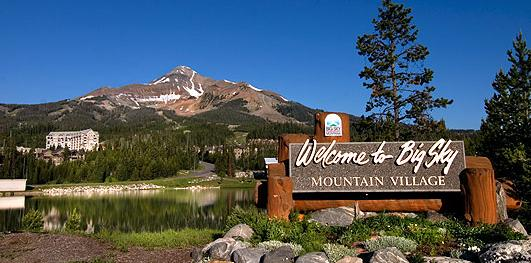

In [7]:
# 草甸村
Image('meadow_village.jpg')

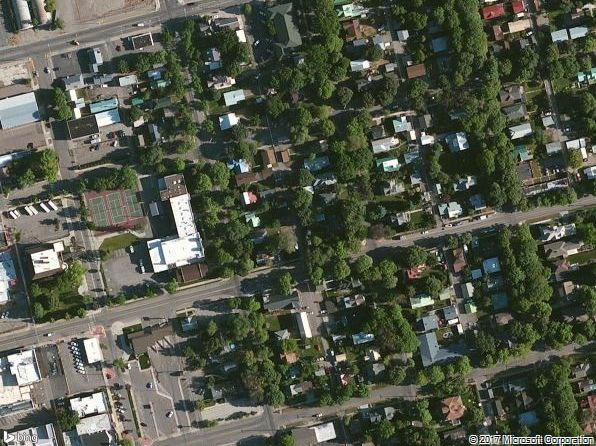

In [8]:
# 北岭高地
Image('Northridge_Heights.jpg')

**再来看一个:**

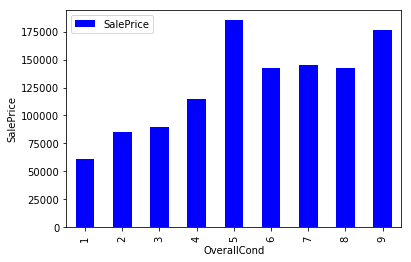

In [9]:
## OverrallCond: 评价房子的整体情况
overallCond_pivot = train.pivot_table(index = 'OverallCond', values = 'SalePrice', aggfunc = np.median)
overallCond_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

**猜想: 之所以评价中等，很可能的原因就是因为房价太高了**

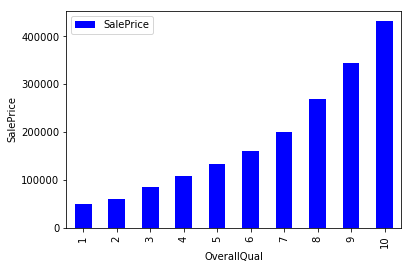

In [10]:
## OverallQual: 房子建造的成本
overallQual_pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
overallQual_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

从图中可以清楚看到，房子的建造成本和销售价格还是成正比关系的。etc.  
以上通过数据透视表看了看一些解释变量与目标变量之间存在的关系。  
现在俯视整张数据表看看数据是如何表现的。

In [11]:
## 售价 描述性统计
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

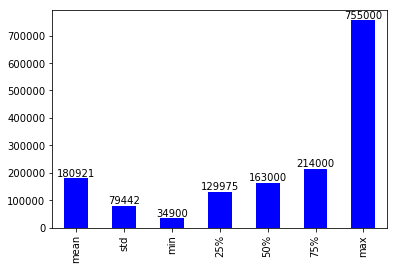

In [12]:
price_describe = train.SalePrice.describe().drop('count')
price_describe.plot(kind = 'bar', color = 'blue')

for i, item in enumerate(price_describe):
    plt.text(i, item, "{}".format(int(item)), ha = 'center', va = 'bottom')
plt.show()

根据上图可以清楚得看出数据分布。  
接下来看一看数据的偏度（skewness）。

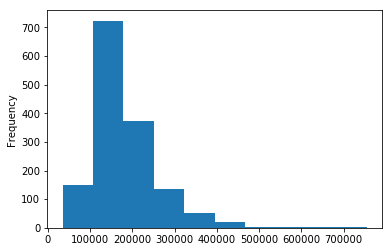

In [13]:
train.SalePrice.plot(kind = 'hist')
plt.show()

从上图可以明显看出数据呈正偏离状态，也叫做右偏离。在pandas中有这么个函数也可以计算出偏度值。

In [14]:
print(train.SalePrice.skew())

1.88287575977


偏度值为正，说明数据呈正偏离状态。

但是我们看到，由于其数据偏离值较高，导致数据在运算时会产生较大的偏差，所以在这里可以用对数函数进行处理。

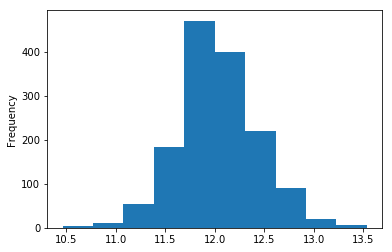

In [15]:
normal_dis_price = np.log(train.SalePrice)
normal_dis_price.plot(kind = 'hist')
plt.show()

这样看着就好多了。

特征工程
====
## 数据转换
接下来我们该看看那些数据的格式为数字，并对存在空值的列进行通过一些手段做些妥当的处理。

In [16]:
## 利用 .select_dtypes() 方法可以从DataFrame中将你选中的数据筛选出来
numeric_features = train.select_dtypes(include = [np.number])

有了这些数字类型的数据之后可以通过pandas中自带的函数corr()计算相关性。

我们来看下各个变量与房价的相关性：

In [17]:
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending = False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


可以看到一些和房子售价正相关以及负相关的变量，首先来看看GrLivArea这个变量。

一般来说，住房面积越大，售价也越高，但是这还并未考虑到其他的影响因素，比如地理位置。这也是个很重要的因素。

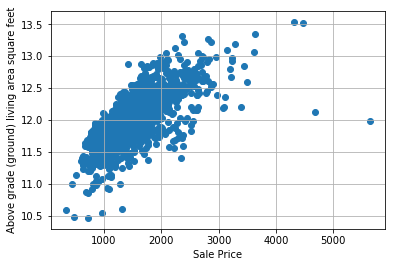

In [18]:
plt.scatter(x = train['GrLivArea'], y = normal_dis_price)
plt.grid(True)
plt.xlabel('Sale Price')
plt.ylabel('Above grade (ground) living area square feet')
plt.show()

看着确实呈正相关，接下来看一下车库面积与房价的对应关系。

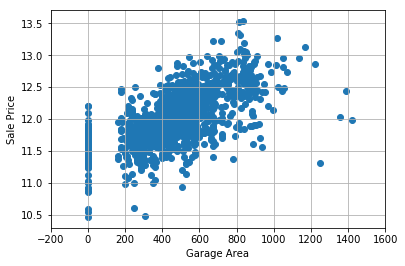

In [19]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.grid(True)
plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

可以看到最右面有几个异常值，这会影响在做回归模型时偏离回归线的程度增大。所以在这里需要做处理去掉异常值。

In [20]:
train = train[train['GarageArea'] < 1200]

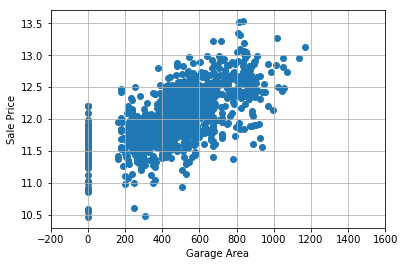

In [21]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.grid(True)
plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

对于这样的数据中很可能存在不少空值、错误的值，在人工录入数据时难免会出现这样的问题。

In [22]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


我们最好要清楚这些存在缺失值的列中有哪些是比较重要的。判断是否重要的根据则是这个列是否会影响到房价，依然可以通过透视表来观测数据的相关性。

去掉缺失值多的列：

In [23]:
train.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], axis = 1, inplace = True)


之后我们应该先处理一下数字类型列的空缺值。

开始填补时，还是需要分析一下其数据分布，以及与该列有关系的列。

In [24]:
nums_df = train.select_dtypes(include = [np.number])
nulls_nums = pd.DataFrame(nums_df.isnull().sum().sort_values(ascending = False)[:5])
nulls_nums.columns = ['Null Count']
nulls_nums.index.name = 'Feature'
nulls_nums

,Null Count
Feature,
GarageYrBlt,81
MasVnrArea,8
SalePrice,0
BsmtFinSF2,0
GrLivArea,0


可以看出目前含有空缺值的列只有MasVnrArea和GarageYrBlt。
其中MasVnrArea指的是砖块的面积，GarageYrBlt指的是车库建成日期。
我本人觉得在这里根本不需要用预测的方法来填补空缺值，对于MasVnrArea取平均值就好了，对于GarageYrBlt，可以去掉这一列。

In [25]:
# 填补空缺值
mean_MV = train.MasVnrArea.mean()
train.loc[(train.MasVnrArea.isnull()), 'MasVnrArea'] = mean_MV

# 去掉 GarageYrBlt 列
train.drop(['GarageYrBlt'], axis = 1, inplace = True)

再来看一下数据情况：

In [26]:
nums_df_ed = train.select_dtypes(include = [np.number])
nulls_nums_ed = pd.DataFrame(nums_df_ed.isnull().sum().sort_values(ascending = False)[:5])
nulls_nums_ed.columns = ['Null Count']
nulls_nums_ed.index.name = 'Feature'
nulls_nums_ed

,Null Count
Feature,
SalePrice,0
YrSold,0
GrLivArea,0
LowQualFinSF,0
2ndFlrSF,0


## 处理非数字的变量

接下来，我们该考虑一下如何处理废数字类型的变量了。

In [27]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,1374,1374,1374,1374,1455,1455,1455
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1147,1450,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,867,605,1306,1321,1335,1266,1196


上表中，count表示非空的统计个数，unique表示在此列中一共有几种值，top是根据出现最频繁的显示结果，下面的freq代表top中显示值的次数。

In [28]:
print('Original: \n')
print(train.Street.value_counts(), '\n')

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



这种方法适用于列中只有2个值的情况，比如MSZoning有5个不同值，需要进行处理为只剩下2个值。首先需要通过透视表进行观察：

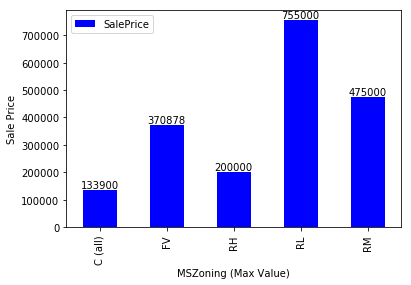

In [29]:
MSZoning_pivot_max = train.pivot_table(index = 'MSZoning', values = 'SalePrice', aggfunc = np.max)
MSZoning_pivot_max.plot(kind = 'bar', color = 'blue')
plt.xlabel('MSZoning (Max Value)')
plt.ylabel('Sale Price')
for i, item in enumerate(MSZoning_pivot_max.values):
    plt.text(i, item, "{}".format(int(item)), ha = 'center', va = 'bottom')
plt.show()

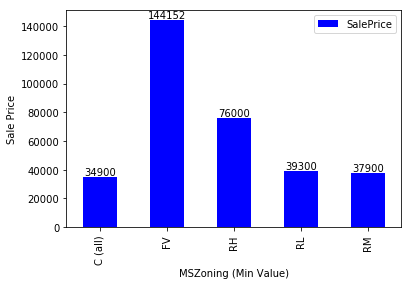

In [30]:
MSZoning_pivot_min = train.pivot_table(index = 'MSZoning', values = 'SalePrice', aggfunc = np.min)
MSZoning_pivot_min.plot(kind = 'bar', color = 'blue')
plt.xlabel('MSZoning (Min Value)')
plt.ylabel('Sale Price')
for i, item in enumerate(MSZoning_pivot_min.values):
    plt.text(i, item, "{}".format(int(item)), ha = 'center', va = 'bottom')
plt.show()

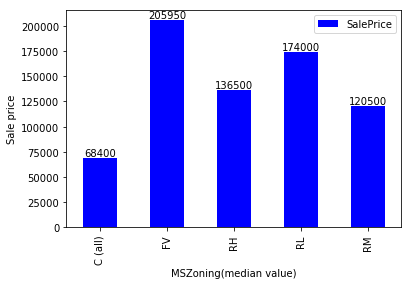

In [31]:
MSZoning_piovt_median = train.pivot_table(index="MSZoning", values="SalePrice", aggfunc=np.median)
MSZoning_piovt_median.plot(kind="bar", color="blue")
plt.xlabel("MSZoning(median value)")
plt.ylabel("Sale price")
for i, item in enumerate(MSZoning_piovt_median.values):
    plt.text(i, item, "{}".format(int(item)), ha='center', va='bottom')
plt.show()

根据上图，我们可以将C(all)和RH归为一类，其他的归为一类。

对于Neighborhood,有25个值，通过透视图我们同样可以用上面的方法进行处理：

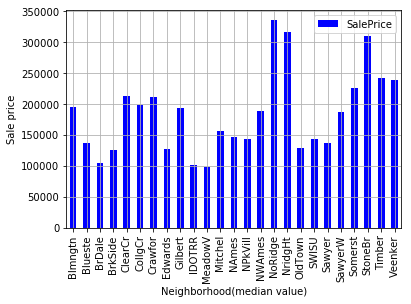

In [32]:
Neighborhood_piovt_median = train.pivot_table(index="Neighborhood", values="SalePrice", aggfunc=np.mean)
Neighborhood_piovt_median.plot(kind="bar", color="blue")
plt.xlabel("Neighborhood(median value)")
plt.ylabel("Sale price")
plt.grid(True)
# for i, item in enumerate(Neighborhood_piovt_median.values):
#   plt.text(i, item, "{}".format(int(item)), ha='center', va='bottom')
plt.show()

将低于25000的值归为一类，剩下的归为一类.

剩下的变量，利用此方法依次处理一下。

In [33]:
dict_of_non_num_variabel = {'MSZoning':['C (all)', 'RH'],
                            'Neighborhood':[ 'NoRidge', 'NridgHt', 'StoneBr'],
                            'LotShape':['Reg'],
                            'LandContour':['Low'],
                            'LotConfig':['FR3', 'CulDSac'],
                            'LandSlope':['Gtl'],
                            'Condition1':['PosA', 'PosN', 'RRNn'],
                            'Condition2':['PosA', 'PosN'],
                            'BldgType':['1Fam', 'TwnhsE'],
                            'HouseStyle':['2.5Fin', '2Story'],
                            'RoofStyle':['Shed'],
                            'RoofMatl':['WdShngl'],
                            'Exterior1st':['CemntBd', 'ImStucc', 'Stone'],
                            'Exterior2nd':['Other'],
                            'MasVnrType':['Stone'],
                            'ExterQual':['Ex'],
                            'ExterCond':['Fa', 'Po'],
                            'Foundation':['PConc'],
                            'BsmtQual':['Ex'],
                            'BsmtCond':['Po'],
                            'BsmtExposure':['No'],
                            'BsmtFinType1':['GLQ'],
                            'BsmtFinType2':['GLQ'],
                            'Heating':['Floor', 'Grav'],
                            'HeatingQC':['Po'],
                            'Electrical':['SBrkr'],
                            'KitchenQual':['Ex'],
                            'Functional':['Maj2'],
                            'PavedDrive':['N'],
                            'SaleType':['Con', 'New'],
                            'SaleCondition':['Partial']}

In [34]:
# 将文字变量转换为one-hot
for k,v in dict_of_non_num_variabel.items():
    for item in v:
        train["encode_" + k] = train[k].apply(lambda x: 0 if x == item else 1 )
        
# Utilities
train['enc_Utilities'] = pd.get_dummies(train.Utilities, drop_first=True)

# CentralAir
train['enc_CentralAir'] = pd.get_dummies(train.CentralAir, drop_first=True)

In [35]:
data = train.select_dtypes(include=[np.number])

接下来，我们将构建一个模型来训练数据。首先选出类标签的列，剩下的为变量。

In [36]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
del(train)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
from sklearn.linear_model import ElasticNet

enet  = ElasticNet(alpha=0.00255)
model = enet.fit(X_train, y_train)

mse_enet = mean_squared_error(y_test, enet.predict(X_test))
print("MSE: %.5f" % mse_enet)

MSE: 0.01716


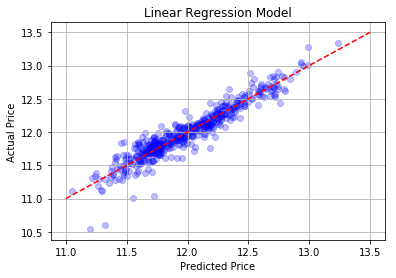

In [38]:
actual_values = y_test
predictions = model.predict(X_test)
plt.grid(True)
plt.scatter(predictions, actual_values, alpha=.25,color='b') #alpha helps to show overlapping data
plt.plot([11,13.5],[11,13.5],'r--')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

接下来是一个调参数的过程，也可以利用网格搜索来处理。不过在网格搜索过程中，参数对结果的影响并不大，这时可以考虑特征工程。我做的特征工程比较粗糙，对一些非数字变量的处理不够细致。

# 生成结果

In [39]:
# 生成结果集
submission = pd.DataFrame()
submission['Id'] = test.Id

In [40]:
test.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], axis=1, inplace=True)

test["YearBuilt"] = 2016 - test["YearBuilt"]
test["YearRemodAdd"] = 2016 - test["YearRemodAdd"]
test["YrSold"] = 2016 - test["YrSold"]
test["GarageYrBlt"] = 2016 - test["GarageYrBlt"]

In [41]:
# 填补空缺值
mean_MV = test.MasVnrArea.mean()
test.loc[(test.MasVnrArea.isnull()), 'MasVnrArea'] = mean_MV

In [42]:
# 去掉 GarageYrBlt 列
test.drop(["GarageYrBlt"], axis=1, inplace=True)

test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

for k,v in dict_of_non_num_variabel.items():
    for item in v:
        test["encode_" + k] = test[k].apply(lambda x: 0 if x == item else 1 )

In [43]:
# Utilities

test['enc_Utilities'] = 1

In [44]:
# CentralAir
test['enc_CentralAir'] = pd.get_dummies(test.CentralAir, drop_first=True)

data_test = test.select_dtypes(include=[np.number])

feats = data_test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [45]:
predictions = model.predict(feats)

ValueError: shapes (1459,68) and (67,) not aligned: 68 (dim 1) != 67 (dim 0)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [ ]:
submission['SalePrice'] = final_predictions
submission.head()

In [ ]:
submission.to_csv('submission1.csv', index=False)